<a href="https://colab.research.google.com/github/yh08037/gnbai20201/blob/master/lab4/gnbai_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GNB AI 프로젝트 4주차 실습
## MLP
### 1. Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Load data

In [0]:
columns = ['x1', 'x2', 'y']
data = pd.read_csv("/content/data_lab3.txt", names=columns, sep=' ')

In [5]:
data

,x1,x2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


### 3. Define x

In [0]:
data_np = np.asarray(data)

# shuffle data
np.random.shuffle(data_np)

# define x
x = data_np[:, :2]

# define y
labels = data_np[:, 2].astype(np.int)
y = np.identity(2)[labels]

In [11]:
labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1])

In [10]:
y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [13]:
x.shape, y.shape

((51, 2), (51, 2))

In [0]:
# define I, N, J, K

I, N = x.shape  # unpacking
J = y.shape[1]
K = 5

In [0]:
# x_bar
x_bar = np.hstack((np.ones((I, 1)), x))

# initialize paramaters
v = np.random.rand(N+1, K)  # weight of hidden layer
w = np.random.rand(K+1, J)  # weight of output layer

In [30]:
v

array([[0.12670187, 0.38997353, 0.46836878, 0.66903969, 0.15220709],
       [0.33186943, 0.48102008, 0.19642047, 0.93122043, 0.0159369 ],
       [0.27912932, 0.93604849, 0.08410263, 0.3999473 , 0.14041838]])

In [31]:
w

array([[0.85196745, 0.38973073],
       [0.04145204, 0.81609409],
       [0.95498898, 0.87977204],
       [0.11124122, 0.78372807],
       [0.47472422, 0.22410504],
       [0.23405142, 0.57932696]])

### 4. Train

In [0]:
# define hyperparameters

alpha1 = 0.01
alpha2 = 0.01

max_epoch = 2000

In [0]:
def sigmoid(z):
    return 1./(np.ones_like(z)+np.exp(-z))

In [0]:
def SSE(g, y):
    result = 0.
    for i in range(g.shape[0]):
        for j in range(g.shape[1]):
            result += (g[i,j]-y[i,j])**2
    return result / 2.

In [35]:
for epoch in range(max_epoch):    
    # forward propagation
    x_bar_bar = np.dot(x_bar, v)
    F = sigmoid(x_bar_bar)
    F_bar = np.hstack((np.ones((I, 1)), F))
    F_bar_bar = np.dot(F_bar, w)
    G = sigmoid(F_bar_bar)

    # back propagation

    # 출력층 단계
    for k in range(0, K+1):
        for j in range(0, J):
            for i in range(0, I):
                w[k,j] -= alpha1*(G[i,j]-y[i,j])*G[i,j]*(1-G[i,j])*F_bar[i,k]

    # 은닉층 단계
    for n in range(0, N+1):
        for k in range(0, K):
            for i in range(0, I):
                for j in range(0, J):
                    v[n,k] -= alpha2*(G[i,j]-y[i,j])*G[i,j]*(1-G[i,j])*w[k,j]*F[i,k]*(1-F[i,k])*x_bar[i,n]
    
    error = SSE(G, y)

    if epoch % 100 == 0:
        print("epoch: %d, error: %.2f" %(epoch, error))

epoch: 0, error: 22.84
epoch: 100, error: 12.60
epoch: 200, error: 12.09
epoch: 300, error: 11.57
epoch: 400, error: 11.32
epoch: 500, error: 11.58
epoch: 600, error: 11.42
epoch: 700, error: 11.10
epoch: 800, error: 10.69
epoch: 900, error: 10.24
epoch: 1000, error: 9.76
epoch: 1100, error: 9.26
epoch: 1200, error: 8.76
epoch: 1300, error: 8.27
epoch: 1400, error: 7.79
epoch: 1500, error: 7.32
epoch: 1600, error: 6.88
epoch: 1700, error: 6.47
epoch: 1800, error: 6.09
epoch: 1900, error: 5.75


In [36]:
v

array([[ 1.95053006,  0.787879  , -0.23186671,  1.02566047, -0.41628361],
       [-0.41995958,  1.1471731 , -0.77046722,  1.48566351,  0.26389818],
       [-0.51620641,  1.85149715, -1.37605233,  1.2013622 ,  0.33204833]])

In [37]:
w

array([[ 0.3469132 , -0.39317307],
       [ 6.05611751, -6.12551074],
       [-0.02327503,  0.59652093],
       [ 1.69820387, -1.35855623],
       [-0.40801603, -0.13958491],
       [-2.28850655,  2.34367731]])

### 5.Test

In [0]:
def h(x, v, w):
    _x_bar = np.hstack((np.ones((I, 1)), x))
    _x_bar_bar = np.dot(_x_bar, v)
    _F = sigmoid(_x_bar_bar)

    _F_bar = np.hstack((np.ones((I, 1)), _F))
    _F_bar_bar = np.dot(_F_bar, w)
    _G = sigmoid(_F_bar_bar)

    return _G

In [0]:
g = h(x, v, w)
labels = np.argmax(g, axis=1)

In [43]:
g

array([[0.28999187, 0.71277712],
       [0.82602652, 0.17176911],
       [0.44035078, 0.56084843],
       [0.69712481, 0.30112573],
       [0.41397946, 0.587555  ],
       [0.63570305, 0.36312171],
       [0.34691138, 0.65535336],
       [0.68178515, 0.31663273],
       [0.44431994, 0.55684282],
       [0.32853594, 0.67390378],
       [0.81352306, 0.18423119],
       [0.87034369, 0.12763055],
       [0.72736349, 0.27070433],
       [0.26399123, 0.73895429],
       [0.2602131 , 0.74275479],
       [0.65329711, 0.34536877],
       [0.34419375, 0.65809432],
       [0.84056485, 0.15724028],
       [0.69124954, 0.30706041],
       [0.59593778, 0.4033349 ],
       [0.423121  , 0.57828937],
       [0.3416382 , 0.66067507],
       [0.72170522, 0.27636039],
       [0.21822279, 0.78493248],
       [0.75109433, 0.24686349],
       [0.43216918, 0.569135  ],
       [0.24958083, 0.75344612],
       [0.28010303, 0.72273633],
       [0.86004013, 0.13791433],
       [0.57735837, 0.42215826],
       [0.

In [44]:
labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1])

### 6. Plot

In [0]:
# 0: 파란색 점 1: 빨간색 점

x_0 = x[labels==0]
x_1 = x[labels==1]

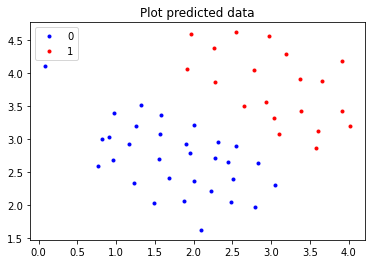

In [59]:
plt.plot(x_0[:,0], x_0[:,1], 'b.', label='0')
plt.plot(x_1[:,0], x_1[:,1], 'r.', label='1')
plt.title('Plot predicted data')
plt.legend()
plt.show()

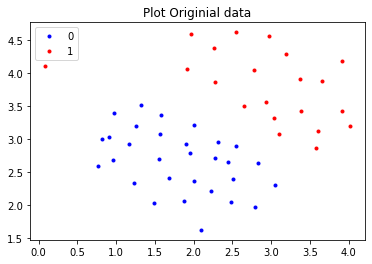

In [60]:
labels_original = np.argmax(y, axis=1)
x_0_original = x[labels_original==0]
x_1_original = x[labels_original==1]

plt.plot(x_0_original[:,0], x_0_original[:,1], 'b.', label='0')
plt.plot(x_1_original[:,0], x_1_original[:,1], 'r.', label='1')
plt.title('Plot Originial data')
plt.legend()
plt.show()